<a href="https://colab.research.google.com/github/KhalidNazzar/Natural-Language-Processing/blob/main/Small_NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-827de351-4c89-f97a-c181-e68635120027)


In [4]:
from special_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [5]:
data = "/content/nlp_getting_started.zip"
unzip_data(data)

In [6]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [8]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [11]:
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
Refugio oil spill may have been costlier bigger than projected http://t.co/gtHddzAvhg #LosAngelesTimes #latimes #news

---

Target: 0 (not real disaster)
Text:
The Most Generous Bride on Earth: Couple Feeds 4000 Syrian Refugees on Their Wedding Day http://t.co/ms8e8mNddb via @thedailybeast love it!

---

Target: 1 (real disaster)
Text:
FAAN orders evacuation of abandoned aircraft at MMA: FAAN noted that the action had become neces... http://t.co/tlS40nqiPN Via @todayngr

---

Target: 1 (real disaster)
Text:
I just wanted to watch Paper Towns but the buildings on fire ?????

---

Target: 0 (not real disaster)
Text:
MarketforceÛªs ÛÏCat SharkÛ wins Sirens round two http://t.co/6F9aFQL6WP #radio #news

---



In [12]:
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [13]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [14]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=None)

In [16]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [17]:
max_vocab_length = 10000
max_length = 15

In [18]:
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [19]:
text_vectorizer.adapt(train_sentences)

In [20]:
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [21]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
@RaidersReporter @957thegame together we can destroy the Emperor and rule the galaxy Father and Son!      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[9381,    1, 1168,   46,   71,  305,    2, 5733,    7, 1603,    2,
           1, 3006,    7, 1473]])>

In [22]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [23]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length,
                             name="embedding_1")

embedding

In [24]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Great British &lt;b&gt;Bake&lt;/b&gt; Off's back and Dorret's &lt;b&gt;chocolate&lt;/b&gt; gateau collapsed - JANÛ_ http://t.co/53LORsrGqf      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.0476972 ,  0.01960434,  0.03518958, ..., -0.03809898,
         -0.02998724, -0.04881022],
        [-0.04424227, -0.02107521, -0.0360743 , ..., -0.03466781,
          0.03737933, -0.01797812],
        [-0.0355681 ,  0.03441863,  0.01167736, ..., -0.021136  ,
          0.03698618, -0.02745674],
        ...,
        [ 0.0157407 , -0.01226027, -0.03909852, ..., -0.03578161,
          0.00904692, -0.04639086],
        [ 0.0157407 , -0.01226027, -0.03909852, ..., -0.03578161,
          0.00904692, -0.04639086],
        [ 0.0157407 , -0.01226027, -0.03909852, ..., -0.03578161,
          0.00904692, -0.04639086]]], dtype=float32)>

In [25]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.0476972 ,  0.01960434,  0.03518958,  0.02700606, -0.02667166,
       -0.00387118, -0.0088654 , -0.00875882, -0.01423118,  0.0338353 ,
       -0.03981899,  0.00452572, -0.00640806, -0.02712567,  0.04442973,
       -0.00549183,  0.02988044,  0.02653452, -0.03762994,  0.01538474,
       -0.04023106, -0.03357785,  0.02331295,  0.02984217,  0.04864314,
       -0.0136584 , -0.01226167, -0.04033859,  0.04367105,  0.01306119,
        0.03014142,  0.00134571,  0.04581046, -0.03898847,  0.00253632,
       -0.01316682, -0.03789293,  0.00950707, -0.04431302,  0.02946433,
        0.04230234,  0.04112465,  0.04179509,  0.00089576, -0.01481504,
       -0.03477684,  0.0461611 ,  0.00198422, -0.03973291,  0.04331601,
       -0.02103487,  0.02186979,  0.03997986, -0.01391983,  0.03355915,
        0.01264621,  0.04574922, -0.04851729, -0.03335198,  0.02390126,
        0.03871873, -0.01953301, -0.01354185,  0.0043018 ,  0.00384372,
        0.009503

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()),
                    ("clf", MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [27]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [28]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [29]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [30]:
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [32]:
from special_functions import create_tensorboard_callback

SAVE_DIR = "model_logs"

In [33]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [34]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [35]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [36]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230721-060211
Epoch 1/5
215/215 [==============================] - 30s 118ms/step - loss: 0.6096 - accuracy: 0.6939 - val_loss: 0.5362 - val_accuracy: 0.7520
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.4411 - accuracy: 0.8184 - val_loss: 0.4695 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3462 - accuracy: 0.8621 - val_loss: 0.4593 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2846 - accuracy: 0.8923 - val_loss: 0.4643 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2377 - accuracy: 0.9124 - val_loss: 0.4768 - val_accuracy: 0.7874


In [37]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.4768 - accuracy: 0.7874


[0.4768158495426178, 0.787401556968689]

In [38]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[-0.00174761, -0.03059759, -0.05920728, ..., -0.05409744,
          0.02845124, -0.03062421],
        [-0.04093998,  0.02843378,  0.00460753, ..., -0.02665096,
          0.04344285, -0.02269851],
        [ 0.00222261, -0.04249237,  0.00397448, ..., -0.01516159,
          0.05209563,  0.0459628 ],
        ...,
        [ 0.0105655 , -0.03165109, -0.01399047, ..., -0.03255769,
         -0.02264091, -0.02920716],
        [-0.08573299, -0.01936887, -0.02982699, ..., -0.04768269,
          0.04124331,  0.09030282],
        [-0.03865758, -0.10671976, -0.04830729, ..., -0.09285261,
          0.07254319,  0.05955063]], dtype=float32)>]

In [39]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [40]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.42175224],
       [0.7457776 ],
       [0.99792933],
       [0.10572509],
       [0.10877926],
       [0.9387648 ],
       [0.9107262 ],
       [0.99244714],
       [0.96826226],
       [0.26333702]], dtype=float32)

In [41]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [42]:
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.74015748031496,
 'precision': 0.7914920592553047,
 'recall': 0.7874015748031497,
 'f1': 0.7846966492209201}

In [43]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [44]:
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 78.74, Difference: -0.52
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


In [45]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [46]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [47]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [48]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue
  vec = embed_weights[num]
  out_m.write(word + "\n")
  out_v.write("\t".join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [50]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [51]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [52]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20230721-060256
Epoch 1/5
215/215 [==============================] - 16s 57ms/step - loss: 0.5112 - accuracy: 0.7454 - val_loss: 0.4572 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3168 - accuracy: 0.8702 - val_loss: 0.5078 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2179 - accuracy: 0.9172 - val_loss: 0.5952 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1501 - accuracy: 0.9464 - val_loss: 0.6028 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1030 - accuracy: 0.9596 - val_loss: 0.9319 - val_accuracy: 0.7467


In [53]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


((762, 1),
 array([[0.00352012],
        [0.7179733 ],
        [0.99937916],
        [0.07297906],
        [0.0033961 ],
        [0.999243  ],
        [0.9824179 ],
        [0.9995746 ],
        [0.9993845 ],
        [0.22056684]], dtype=float32))

In [54]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [55]:
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 74.67191601049869,
 'precision': 0.7470712708201386,
 'recall': 0.7467191601049868,
 'f1': 0.7448983201411337}

In [56]:
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 79.27, New accuracy: 74.67, Difference: -4.59
Baseline precision: 0.81, New precision: 0.75, Difference: -0.06
Baseline recall: 0.79, New recall: 0.75, Difference: -0.05
Baseline f1: 0.79, New f1: 0.74, Difference: -0.04


In [57]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [58]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [59]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [60]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20230721-060340
Epoch 1/5
215/215 [==============================] - 18s 64ms/step - loss: 0.5228 - accuracy: 0.7310 - val_loss: 0.4564 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3186 - accuracy: 0.8695 - val_loss: 0.4909 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2201 - accuracy: 0.9167 - val_loss: 0.5564 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1601 - accuracy: 0.9456 - val_loss: 0.6091 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1234 - accuracy: 0.9581 - val_loss: 0.6148 - val_accuracy: 0.7743


In [61]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 1s 5ms/step


((762, 1),
 array([[0.4867058 ],
        [0.84504414],
        [0.9969367 ],
        [0.13953666],
        [0.01461284],
        [0.9925609 ],
        [0.70551497],
        [0.9981438 ],
        [0.9973802 ],
        [0.36225453]], dtype=float32))

In [62]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [63]:
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.42782152230971,
 'precision': 0.7742199344647137,
 'recall': 0.7742782152230971,
 'f1': 0.7733345847061507}

In [64]:
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.27, New accuracy: 77.43, Difference: -1.84
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


In [65]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [66]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [67]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [68]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20230721-060410
Epoch 1/5
215/215 [==============================] - 18s 62ms/step - loss: 0.5097 - accuracy: 0.7457 - val_loss: 0.4578 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3118 - accuracy: 0.8736 - val_loss: 0.5228 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.2105 - accuracy: 0.9190 - val_loss: 0.5646 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1424 - accuracy: 0.9533 - val_loss: 0.6479 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1007 - accuracy: 0.9651 - val_loss: 0.7230 - val_accuracy: 0.7651


In [69]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


array([[0.03214623],
       [0.8674975 ],
       [0.99950457],
       [0.15792902],
       [0.00546419],
       [0.99846846],
       [0.9887017 ],
       [0.9997309 ],
       [0.99958307],
       [0.21496046]], dtype=float32)

In [70]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [71]:
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 76.50918635170603,
 'precision': 0.7647692804612646,
 'recall': 0.7650918635170604,
 'f1': 0.7643429612523406}

In [72]:
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 79.27, New accuracy: 76.51, Difference: -2.76
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.77, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.02


In [73]:
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu")
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [74]:
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[-0.01532438, -0.03451281, -0.01499902, ...,  0.01657343,
           0.0252773 ,  0.02117543],
         [-0.07306479, -0.05440709,  0.01205972, ..., -0.04884258,
           0.00912184,  0.02038549],
         [-0.00901667,  0.00575272, -0.02214018, ..., -0.03487253,
           0.0385418 ,  0.01795701],
         ...,
         [-0.00174761, -0.03059759, -0.05920728, ..., -0.05409744,
           0.02845124, -0.03062421],
         [-0.00174761, -0.03059759, -0.05920728, ..., -0.05409744,
           0.02845124, -0.03062421],
         [-0.00174761, -0.03059759, -0.05920728, ..., -0.05409744,
           0.02845124, -0.03062421]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.        , 0.02483313, 0.        , 0.01884   , 0.0700707 ,
          0.        , 0.        , 0.        , 0.        , 0.00588411,
          0.00185901, 0.04088765, 0.08158493, 0.06346712, 0.        ,
          0.01109291, 0.

In [75]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [76]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230721-060442
Epoch 1/5
215/215 [==============================] - 14s 53ms/step - loss: 0.5641 - accuracy: 0.7192 - val_loss: 0.4701 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3435 - accuracy: 0.8612 - val_loss: 0.4714 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2152 - accuracy: 0.9225 - val_loss: 0.5304 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1385 - accuracy: 0.9564 - val_loss: 0.6188 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0985 - accuracy: 0.9677 - val_loss: 0.6593 - val_accuracy: 0.7756


In [77]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.7814676 ],
       [0.76354504],
       [0.99981254],
       [0.16220766],
       [0.01063463],
       [0.99897087],
       [0.9277865 ],
       [0.99766624],
       [0.998601  ],
       [0.10304117]], dtype=float32)

In [78]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [79]:
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 77.55905511811024,
 'precision': 0.7806291092122156,
 'recall': 0.7755905511811023,
 'f1': 0.7721994170090103}

In [80]:
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 79.27, New accuracy: 77.56, Difference: -1.71
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


In [81]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [82]:
embed_samples[0].shape

TensorShape([512])

In [83]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [84]:
model_6 = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [85]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230721-060540
Epoch 1/5
215/215 [==============================] - 8s 20ms/step - loss: 0.5041 - accuracy: 0.7856 - val_loss: 0.4484 - val_accuracy: 0.7992
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4154 - accuracy: 0.8132 - val_loss: 0.4374 - val_accuracy: 0.8071
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4007 - accuracy: 0.8209 - val_loss: 0.4332 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3933 - accuracy: 0.8253 - val_loss: 0.4289 - val_accuracy: 0.8176
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3870 - accuracy: 0.8279 - val_loss: 0.4305 - val_accuracy: 0.8150


In [86]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 12ms/step


array([[0.16243444],
       [0.7364356 ],
       [0.98852634],
       [0.1895408 ],
       [0.7396878 ],
       [0.6681155 ],
       [0.9804397 ],
       [0.9776989 ],
       [0.92314667],
       [0.08878846]], dtype=float32)

In [87]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [88]:
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.49606299212599,
 'precision': 0.8179063565195398,
 'recall': 0.8149606299212598,
 'f1': 0.8132300658103407}

In [89]:
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 79.27, New accuracy: 81.50, Difference: 2.23
Baseline precision: 0.81, New precision: 0.82, Difference: 0.01
Baseline recall: 0.79, New recall: 0.81, Difference: 0.02
Baseline f1: 0.79, New f1: 0.81, Difference: 0.03


In [90]:
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [91]:
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


In [92]:
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
dtype: int64

In [93]:
model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [94]:
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20230721-060608
Epoch 1/5
22/22 [==============================] - 5s 67ms/step - loss: 0.6762 - accuracy: 0.6341 - val_loss: 0.6524 - val_accuracy: 0.7297
Epoch 2/5
22/22 [==============================] - 1s 24ms/step - loss: 0.6005 - accuracy: 0.8105 - val_loss: 0.5916 - val_accuracy: 0.7585
Epoch 3/5
22/22 [==============================] - 1s 25ms/step - loss: 0.5196 - accuracy: 0.8280 - val_loss: 0.5372 - val_accuracy: 0.7677
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4535 - accuracy: 0.8353 - val_loss: 0.5055 - val_accuracy: 0.7703
Epoch 5/5
22/22 [==============================] - 1s 29ms/step - loss: 0.4093 - accuracy: 0.8397 - val_loss: 0.4889 - val_accuracy: 0.7743


In [95]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 12ms/step


array([[0.24969415],
       [0.82505864],
       [0.9161966 ],
       [0.2882951 ],
       [0.5647526 ],
       [0.8417049 ],
       [0.8206988 ],
       [0.85125816],
       [0.84485906],
       [0.14309998]], dtype=float32)

In [96]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [97]:
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 77.42782152230971,
 'precision': 0.7782373722272058,
 'recall': 0.7742782152230971,
 'f1': 0.7712566971963791}

In [98]:
compare_baseline_to_new_results(baseline_results, model_7_results)

Baseline accuracy: 79.27, New accuracy: 77.43, Difference: -1.84
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


In [99]:
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.740157,0.791492,0.787402,0.784697
lstm,74.671916,0.747071,0.746719,0.744898
gru,77.427822,0.774220,0.774278,0.773335
bidirectional,76.509186,0.764769,0.765092,0.764343
conv1d,77.559055,0.780629,0.775591,0.772199
tf_hub_sentence_encoder,81.496063,0.817906,0.814961,0.813230
tf_hub_10_percent_data,77.427822,0.778237,0.774278,0.771257


In [100]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100

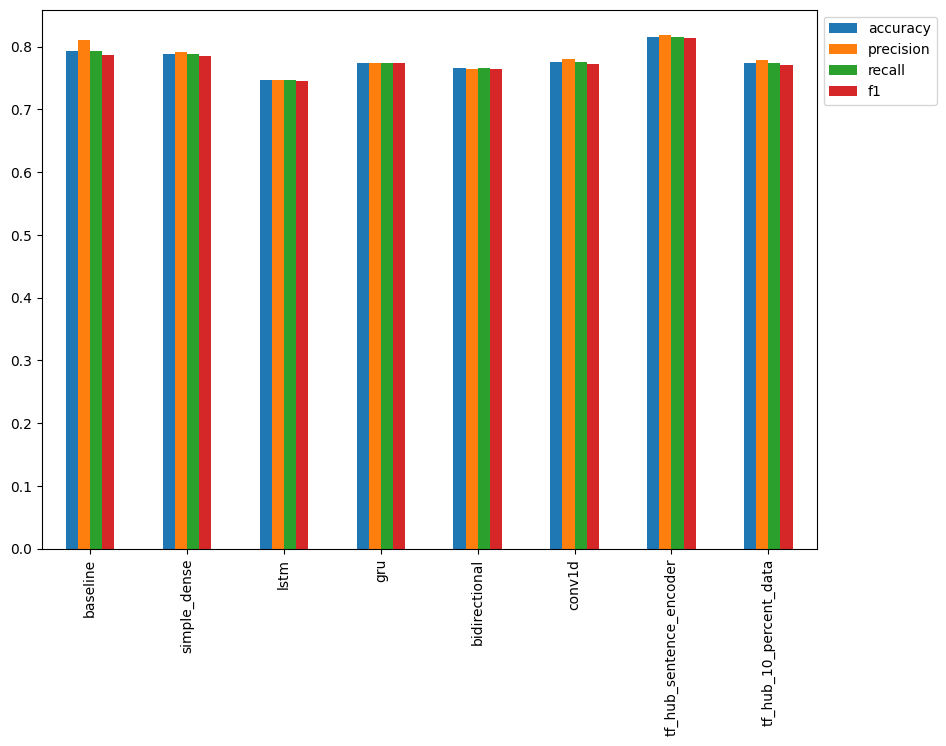

In [101]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

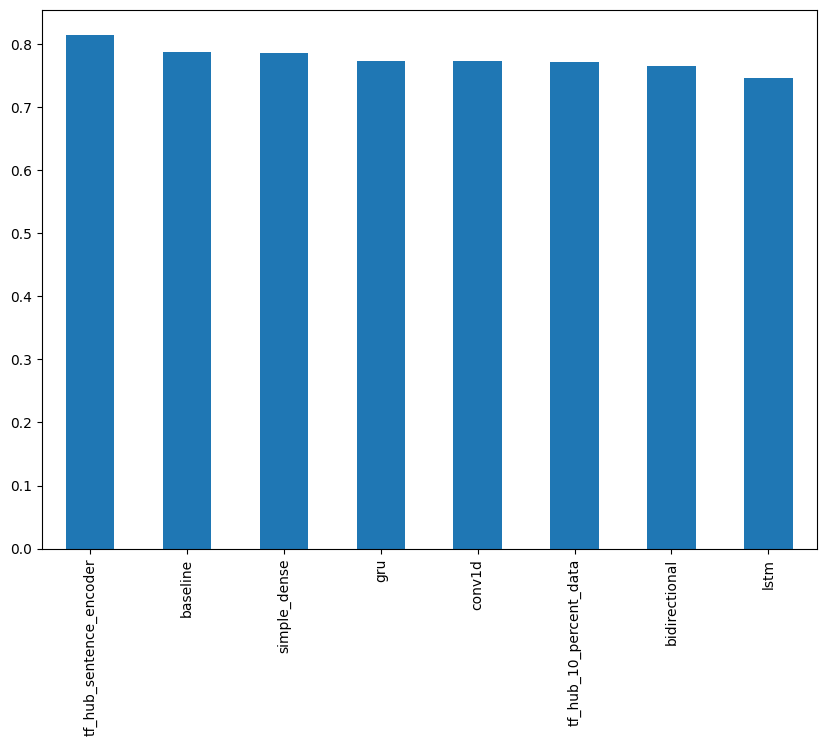

In [102]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [103]:
!tensorboard dev upload --logdir ./model_logs \
  --name "NLP modelling experiments" \
  --description "A series of different NLP modellings experiments with various models" \
  --one_shot

2023-07-21 06:06:19.055392: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/XhNZikMyRcyBiV17oBYxqA/

[2023-07-21T06:06:21] Started scanning logdir.
[2023-07-21T06:06:35] Total uploaded: 420 scalars, 0 tensors, 14 binary objects (5.7 MB)
[2023-07-21T06:06:35] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/XhNZikMyRcyBiV17oBYxqA/


In [104]:
!tensorboard dev delete --experiment_id EXPERIMENT_ID_TO_DELETE

2023-07-21 06:06:38.047908: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Internal error deleting experiment EXPERIMENT_ID_TO_DELETE: <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.INVALID_ARGUMENT
	details = "Invalid experiment ID: 'EXPERIMENT_ID_TO_DELETE'"
	debug_error_string = "UNKNOWN:Error received from peer ipv4:34.95.66.171:443 {created_time:"2023-07-21T06:06:39.97382086+00:00", grpc_status:3, grpc_message:"Invalid experiment ID: \'EXPERIMENT_ID_TO_DELETE\'"}"
>.



In [105]:
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1)
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3)
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [106]:
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 77.29658792650919,
 'precision': 0.7726091269398356,
 'recall': 0.7729658792650919,
 'f1': 0.772485380005067}

In [107]:
all_model_results.loc["ensemble_results"] = ensemble_results

In [108]:
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100

In [109]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.787402,0.791492,0.787402,0.784697
lstm,0.746719,0.747071,0.746719,0.744898
gru,0.774278,0.774220,0.774278,0.773335
bidirectional,0.765092,0.764769,0.765092,0.764343
conv1d,0.775591,0.780629,0.775591,0.772199
tf_hub_sentence_encoder,0.814961,0.817906,0.814961,0.813230
tf_hub_10_percent_data,0.774278,0.778237,0.774278,0.771257
ensemble_results,0.772966,0.772609,0.772966,0.772485


In [110]:
model_6.save("model_6.h5")

In [111]:
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [112]:
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 19ms/step - loss: 0.4305 - accuracy: 0.8150


[0.4305426776409149, 0.8149606585502625]

In [113]:
model_6.save("model_6_SavedModel_format")

In [114]:
loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel_format")

In [115]:
loaded_model_6_SavedModel.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 21ms/step - loss: 0.4305 - accuracy: 0.8150


[0.43054264783859253, 0.8149606585502625]

In [116]:
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.162434
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.736436
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988526
3,@camilacabello97 Internally and externally scr...,1,0.0,0.189541
4,Radiation emergency #preparedness starts with ...,1,1.0,0.739688


In [117]:
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.917562
628,@noah_anyname That's where the concentration c...,0,1.0,0.869985
759,FedEx will no longer transport bioterror patho...,0,1.0,0.855852
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.842966
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.838896
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.804379
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.788179
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.786447
144,The Sound of Arson,0,1.0,0.766857
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.760762


In [118]:
for row in most_wrong[:10].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9175617098808289
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8699854016304016
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8558523654937744
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8429659605026245
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob: 0.8388956785202026
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.804379403591156
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Pro

In [119]:
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 113ms/step
Pred: 1, Prob: 0.9920588731765747
Text:
#FortitudeValley unit damaged and residents evacuated after fire broke out after 7am this morning #7News http://t.co/8iZgxCeLcc

----

1/1 [==============================] - 0s 61ms/step
Pred: 1, Prob: 0.7403131723403931
Text:
#yyc #hailstorm #christmas came early https://t.co/f0A2IIzx3A

----

1/1 [==============================] - 0s 47ms/step
Pred: 1, Prob: 0.9175615906715393
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

1/1 [==============================] - 0s 50ms/step
Pred: 1, Prob: 0.7616687417030334
Text:
Acting Public Information Officer (PIO) Until Monday August 10 http://t.co/FEBu2dH9Hs http://t.co/DsxV9p4eBz

----

1/1 [==============================] - 0s 49ms/step
Pred: 0, Prob: 0.3902139961719513
Text:
I just got electrocuted by my #HP Chromebook charger it sparked and caught fire #HP http://t.co/UBywQHoaWr

----

1/1 [=======================

In [120]:
khalids_tweet = "Life like an ensemble: take the best choices from others and make your own"

In [121]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [122]:
predict_on_sentence(model=model_6,
                    sentence=khalids_tweet)

1/1 [==============================] - 0s 50ms/step
Pred: 0.0 (not real disaster) Prob: 0.04691047966480255
Text:
Life like an ensemble: take the best choices from others and make your own


In [123]:
# Source - https://twitter.com/BeirutCityGuide/status/1290696551376007168
beirut_tweet_1 = "Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon"

# Source - https://twitter.com/BeirutCityGuide/status/1290773498743476224
beirut_tweet_2 = "#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon"

In [124]:
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_1)

1/1 [==============================] - 0s 42ms/step
Pred: 1.0 (real disaster) Prob: 0.9608044624328613
Text:
Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon


In [125]:
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_2)

1/1 [==============================] - 0s 46ms/step
Pred: 1.0 (real disaster) Prob: 0.9694178104400635
Text:
#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon


In [126]:
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.

  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find prediction time per sample
  return total_time, time_per_pred

In [127]:
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 11ms/step


(0.36525646500012954, 0.0004793391929135558)

In [128]:
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.03504696999971202, 4.5993398949753304e-05)

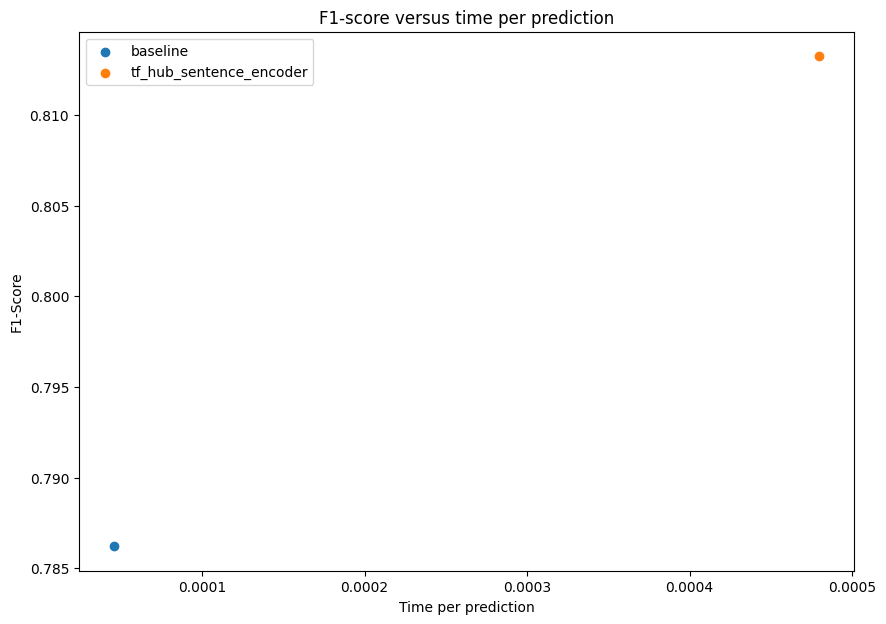

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");